# Actividad Final Python

## Analisis SteamDataset por Darío P

### Índice
+ 1º Introducción
+ 2º Tratamiento de datos
+ 3º Tratamiento de datos orientado al estudio del Género
+ 4º Analisis (Géneros)
  + 4.1º Conclusión del analisis con respecto al Género
+ 5º Tratamiento de datos orientado al estudio de la Categoría
+ 6º Analisis (Categorías)
  + 6.1º Conclusión analisis de Categorías
+ 7º Tratamiento de datos orientado al estudio de Precio contra Consumidores
+ 8º Analisis (Precio vs Consumidores)
  + 8.1º Conclusión (Precio vs Consumidores)
+ 9º Conclusión Final

### 1º Introducción

+ El objetivo de esta actividad, es analizar la realidad que se vive en los videojuegos tanto en categoría como en género y su respectivo precio de la plataforma Steam, no se tratarán datos de consolas ni móviles. Para realizar esta actividad he utilizado el siguiente fichero.
 + <b>steam.csv</b> : Este mismo contiene la información de el nombre del juego, la fecha de lanzamiento, si está en inglés, la desarrolladora, la publicadora, en que plataforma se enncuentra, la edad requerida de los jugadores para poder jugar el videojuego, la categoría, el género del mismo, las etiquetas que le pone steam para promocionarlo, ratings positivos y negativos, el tiempo medio jugado, la media de tiempo jugado, los propietarios del juego y su precio.
 + La información y este data set lo he extraido de la página:
    +  https://www.kaggle.com/nikdavis/steam-store-games
+ Ahora a continuación pasaré a importar las librerias necesarias para poder empezar con el analisis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

+ Desempaquetamos el zip para obtener el dataset

In [9]:
import zipfile as zp # para descomprimir archivos zip
#import urllib.request # para descargar de URL
import os

# descargar SteamStoreGames dataset
#url = 'https://www.kaggle.com/nikdavis/steam-store-games/download'  
local_zip = os.path.join("res", "archive.zip")
#urllib.request.urlretrieve(url, local_zip)
# descomprimiendo archivo zip
with zp.ZipFile(local_zip, 'r') as zipp: 
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res")) # destino
    print('Done!') 

Extracting all files...
Done!


### 2º Tratamiento de datos

+ Una vez tengamos descomprimiedo el paquete zip que hemos descargado, podemos seguir y empezar el tratamiento de datos, para dejar los como los necesitemos para hacer un correcto analisis
   + Buscamos el data set y le damos unas columnas 

In [2]:
root_path = os.path.join("res", "SteamData" )

steam_dataset = pd.read_csv(os.path.join(root_path, "steam.csv"), sep=',',
                                index_col=0, engine='python',
                                names=['appid','name','release_date','english','developer','publisher',
                                       'platforms','required_age','categories','genres','steamspy_tags','achievements',
                                       'positive_ratings','negative_ratings','average_playtime','median_playtime',
                                      'owners','price'], encoding='utf-8')



+ Imprimimos el primer resultado, viendo así todas las columnas y datos dentro del dataset

In [3]:
steam_dataset.sample(5)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
562730,MechDefender,2017-03-21,1,Badim,Badim,windows;mac,0,Single-player;Steam Achievements;Steam Trading...,Action;Casual;Indie;Strategy;Early Access,Early Access;Indie;Strategy,18,8,11,314,314,50000-100000,3.99
296590,Draconian Wars,2014-08-28,1,Kardfy Studios,Kardfy Studios,windows,0,Single-player;Multi-player;Steam Achievements;...,Indie;Strategy,Strategy;Indie;Card Game,27,18,25,0,0,0-20000,4.79
710280,Musician,2018-03-19,1,ZhangHaiLong,ZhangHaiLong,windows,0,Single-player;Multi-player,Casual;Indie;Simulation,Indie;Casual;Simulation,0,1,0,0,0,0-20000,10.29
590530,World Builder,2017-03-14,1,"Guruji VR, Inc","Guruji VR, Inc",windows,0,Single-player;Steam Workshop;Includes level ed...,Casual;Indie;Simulation,Indie;Simulation;Casual,0,16,3,0,0,0-20000,6.99
403970,The Dwarves,2016-12-01,1,KING Art,THQ Nordic;EuroVideo Medien,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,RPG,RPG;Fantasy;Real-Time with Pause,34,936,311,117,117,100000-200000,34.99


In [3]:
steam_price = steam_dataset.copy()

+ Empezamos quitando columnas que no vamos a gastar en este analisis

In [4]:
def drop_columns(data,columns):
    return data.drop(columns,axis=1)

columns_to_drop = ['release_date','english','developer','publisher','required_age','achievements','steamspy_tags']
steam_dataset = drop_columns(steam_dataset,columns_to_drop)

In [6]:
#steam_dataset.sample(5)

### 3º Tratamiento de datos orientado al estudio del Género

+ Seguimos descomponiendo los valores de genero en valores unicos

In [5]:
all_genres = steam_dataset['genres'].apply(lambda x : x.split(';'))
#print(all_genres)

genreS = pd.unique([genre for x in all_genres for genre in x])
#print(genreS)

+ Creamos una tabla con todos los generos que existen en el dataframe

In [6]:
# crear tabla con columnas por género
zeros = np.zeros( (len(steam_dataset), len(genreS)) )
genres_frame = pd.DataFrame(zeros,columns=genreS, index= steam_dataset.index)
columns_to_drop = ['genres']
genres_frame = drop_columns(genres_frame,columns_to_drop)
#genres_frame.head(5)

+ Con los valores del genero original asignamos 1 y 0 dependiendo si el genero existe en cada juego

In [7]:
columns_genres = genres_frame.columns # lista de generos (columnas)
# para cada juego, marcar género con 1
for i, genre in enumerate(steam_dataset['genres']):
    inds = columns_genres.get_indexer(genre.split(';')) # retorna los indices correspondientes a los generos de cada juego
    genres_frame.iloc[i,inds] = 1 # localiza las columnas del genero correspondiente, marca con 1

In [8]:
#filtro juegos por genero
genres_frame.head(5)

,Action,Free to Play,Strategy,Adventure,Indie,RPG,Animation & Modeling,Video Production,Casual,Simulation,...,Web Publishing,Education,Software Training,Sexual Content,Audio Production,Game Development,Photo Editing,Accounting,Documentary,Tutorial
appid,,,,,,,,,,,,,,,,,,,,,
appid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


+ Y ahora hacemos un join para unir ambos dataframes y eliminaremos la columna genero porque ya no nos sirve ya que la hemos descompuesto en varias columnas

In [9]:
steam_split_genre = steam_dataset.join(genres_frame)

In [10]:
columns_to_drop = ['genres','categories','platforms','average_playtime','median_playtime','price']
steam_split_genre = drop_columns(steam_split_genre,columns_to_drop)
#display(steam_split_genre.head(5))

In [11]:
steam_split_genre.drop(["appid"], inplace = True)
#display(steam_split_genre.head(5))

In [12]:
def split_owners(owners):
    index = owners.index('-')
    return owners[index:].replace('-',' ')
steam_split_genre['owners'] = steam_split_genre['owners'].apply(split_owners)
#steam_split_genre.head(5)

In [13]:
steam_split_genre['owners'] = steam_split_genre['owners'].astype(int)
steam_split_genre['positive_ratings'] = steam_split_genre['positive_ratings'].astype(int)
steam_split_genre['negative_ratings'] = steam_split_genre['negative_ratings'].astype(int)

In [15]:
steam_split_genre.head(5)

,name,positive_ratings,negative_ratings,owners,Action,Free to Play,Strategy,Adventure,Indie,RPG,...,Web Publishing,Education,Software Training,Sexual Content,Audio Production,Game Development,Photo Editing,Accounting,Documentary,Tutorial
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,124534,3339,20000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Team Fortress Classic,3318,633,10000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,Day of Defeat,3416,398,10000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Deathmatch Classic,1273,267,10000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,Half-Life: Opposing Force,5250,288,10000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4º Analisis  (Géneros)
+ Después de extraer y arreglar los datos para su fácil utilización, pasamos a su siguiente análisis:
    + Como podemos ver en los siguientes gráficos:
      

<function matplotlib.pyplot.show(*args, **kw)>

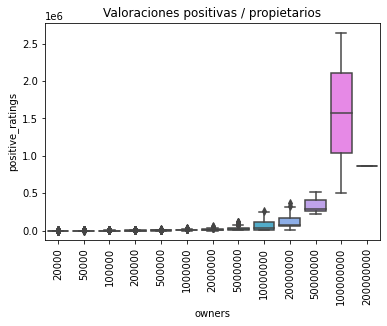

In [18]:
sns.boxplot(y="positive_ratings", x="owners", data=steam_split_genre)
plt.xticks(rotation=90)
plt.title('Valoraciones positivas / propietarios')
plt.show
#en relacion a las ventas se puede observar una subbida exponencial de valoraciones positivas

+ Como podemos denotar en este gráfico, podemos ver que a mayor gente con un juego mas valoraciónes positivas puede aspirar y obtenner. Podemos destacar pues que a mas fama mayores reviews positivas

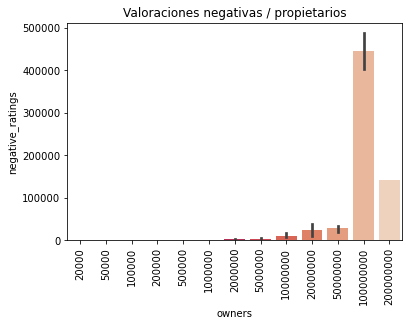

In [20]:
sns.barplot(x='owners',y='negative_ratings',palette="rocket",data=steam_split_genre)
plt.xticks(rotation=90)
plt.title('Valoraciones negativas / propietarios')
plt.show()
#como podemos observar la gente suele valorar mas negativamente los juegos mas conocidos o mas vendidos

+ Anteriormente hemos visto los resultados de las valoraciones positivas, pero ahora le hechamos un vistazo a los valores que nos da analizar las valoraciones negativas en cuanto a propietarios. Los resultados son los esperados, como antes he comentado, a cuanta mayor fama, mas valoraciónes obtiene el titulo, ya sean positivas o negativas generalmente hablando.

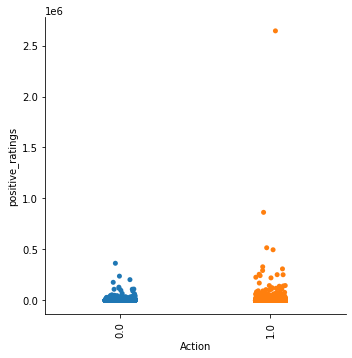

In [127]:
sns.catplot(x='Action',y='positive_ratings',data=steam_split_genre)
plt.xticks(rotation=90)
plt.show()
#podemos observar que no hay casi ratings positivos en cuanto a gente con juegos de este genero

 + Podemos ver que en cuanto al género de Acción se puede interpretar que la gente que tiene un videojuego de acción, da un buen feedback a los desarrolladores valorando su juego de forma positiva. 

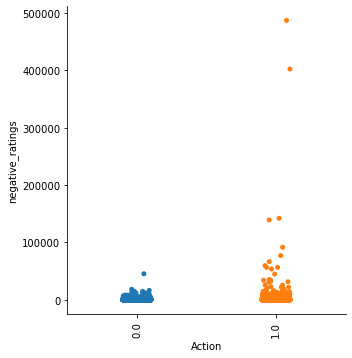

In [125]:
sns.catplot(x='Action',y='negative_ratings',data=steam_split_genre)
plt.xticks(rotation=90)
plt.show()
#podemos observar que no hay casi ratings negativos en comparacionn con positivos de este mismo genero

 + En este gráfico podemos ver que sucede lo mismo que en las reglas generales, podemos denotar que existen valoraciones negativas en cuanto al género de acción, pero como en el mismo caso que sucede en reglas generales, existen mas valoraciones positivas que negativas. Este suceso se lleva a cabo en todos los géneros analizados, pero he decidido poner el de acción porque se puede ver muy bien la diferencia

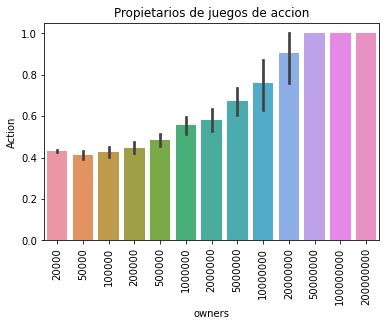

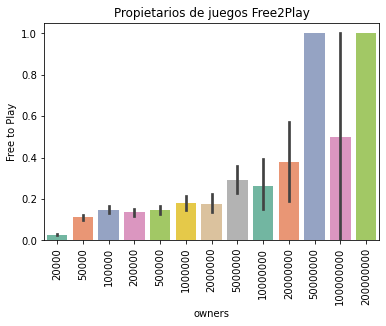

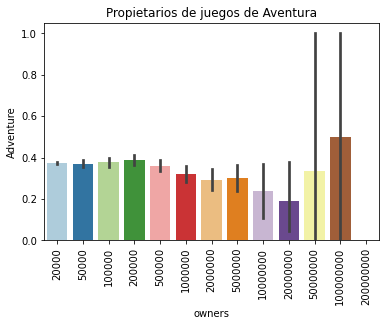

In [16]:
#Comparando 3 generos de los mas conocidos podemos ver grandes diferencias del consumo de la gente ante preferentes generos
sns.barplot(x = 'owners',y = 'Action', data = steam_split_genre)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos de accion')
plt.show()
sns.barplot(x = 'owners',y = 'Free to Play', palette='Set2', data = steam_split_genre)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos Free2Play')
plt.show()
sns.barplot(x = 'owners',y = 'Adventure',palette = 'Paired', data = steam_split_genre)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos de Aventura')
plt.show()

+ Como podemos ver en las gráficas ya mostradas, el género que cuenta con mayor numero de jugadores es el de acción, he querido elegir estos tres, porque son de los géneros mas famosos, y queria darme cuenta en la diferencia de jugadores. Como se puede observar los juegos de acción son de lo mas vendidos en Steam, mas incluso que los free2play, o los de aventura que le siguen de cerca. 

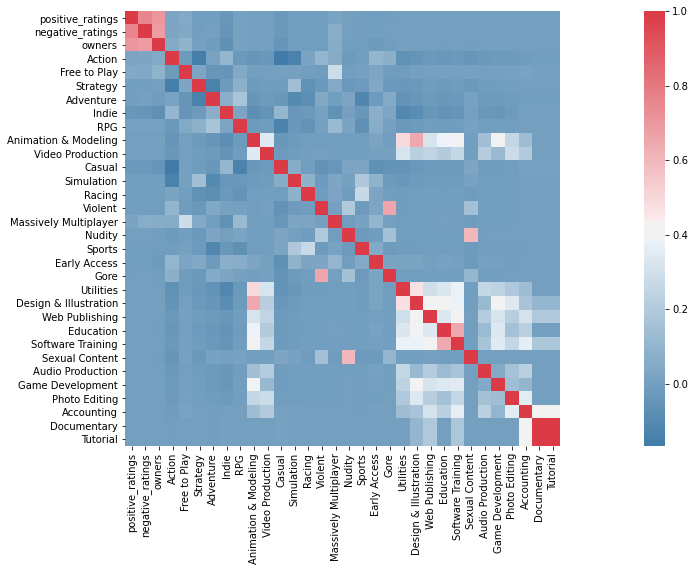

In [121]:
f, ax = plt.subplots(figsize=(30, 8))
corr = steam_split_genre.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(240, 10, n=9,as_cmap=True),square=True, ax=ax, annot = False)

### 4.1º Conclusión del analisis con respecto al Género


+ Para poder finalizar el analisis en respectivo a los géneros de los videojuegos, se puede demostrar que existen correlaciones entre géneros y seguramente muchos juegos compartan géneros, aparte de la obvia relación entre ciertos géneros que muy probablemente vayan de la mano, como pueden ser Gore y violencia, dos géneros muy caracteríticos en juegos de peleas como puede ser Mortal Combat.

### 5º Tratamiento de datos orientado al estudio de la Categoría
   + Ahora que he concluido de analizar los datos de género, voy a seguir analizando los datos de Categorías, para ello primero debo arreglar el dataset para dejarmelo usable y entendible.

In [19]:
all_categories = steam_dataset['categories'].apply(lambda x : x.split(';'))
#print(all_categories)

Categ = pd.unique([cat for x in all_categories for cat in x])
#print(Categ)

In [20]:
# crear tabla con columnas por categoria
zeros = np.zeros( (len(steam_dataset), len(Categ)) )
categ_frame = pd.DataFrame(zeros,columns=Categ, index= steam_dataset.index)
columns_to_drop = ['categories']
categ_frame = drop_columns(categ_frame,columns_to_drop)
#categ_frame.head(5)

In [21]:
columns_ctg = categ_frame.columns # lista de categorias (columnas)
# para cada juego, marcar categoria con 1
for i, cat in enumerate(steam_dataset['categories']):
    inds = columns_ctg.get_indexer(cat.split(';')) # retorna los indices correspondientes a las categorias de cada juego
    categ_frame.iloc[i,inds] = 1 # localiza las columnas de la categoria correspondiente, marca con 1

In [22]:
#filtro juegos por genero
categ_frame.head(5)

,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,Single-player,Steam Cloud,Steam Achievements,Steam Trading Cards,Captions available,Partial Controller Support,...,Steam Leaderboards,SteamVR Collectibles,Online Co-op,Shared/Split Screen,Local Co-op,MMO,VR Support,Mods,Mods (require HL2),Steam Turn Notifications
appid,,,,,,,,,,,,,,,,,,,,,
appid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
steam_split_ctg = steam_dataset.join(categ_frame)

In [24]:
columns_to_drop = ['categories','genres','platforms','positive_ratings','negative_ratings','average_playtime','median_playtime','price']
steam_split_ctg = drop_columns(steam_split_ctg,columns_to_drop)
#display(steam_split_ctg.head(5))

In [25]:
steam_split_ctg.drop(["appid"], inplace = True)

In [72]:
#display(steam_split_ctg.head(5))

In [26]:
steam_split_ctg['owners'] = steam_split_ctg['owners'].apply(split_owners)
#steam_split_ctg.head(5)

In [27]:
steam_split_ctg['owners'] = steam_split_ctg['owners'].astype(int)

In [28]:
steam_split_ctg.head(5)

,name,owners,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,Single-player,Steam Cloud,Steam Achievements,Steam Trading Cards,...,Steam Leaderboards,SteamVR Collectibles,Online Co-op,Shared/Split Screen,Local Co-op,MMO,VR Support,Mods,Mods (require HL2),Steam Turn Notifications
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,20000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Team Fortress Classic,10000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,Day of Defeat,10000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Deathmatch Classic,10000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,Half-Life: Opposing Force,10000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


+ Después de quitar columnas que no voy a gastar en este analisis y prepararme los datos para fácil acceso y uso pertinente, voy a pasar a su análisis.

### 6º Analisis (Categorías)

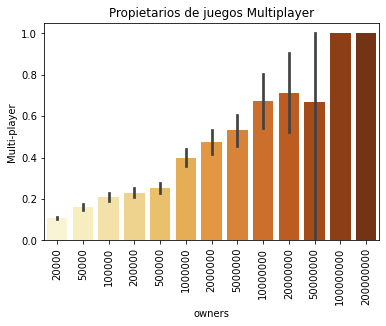

In [31]:
sns.barplot(x = 'owners',y = 'Multi-player',palette=("YlOrBr"), data = steam_split_ctg)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos Multiplayer')
plt.show()

+ Como podemos ver en esta gráfica mostramos la cantidad de jugadores que tienen un juego con categoría multiplayer.

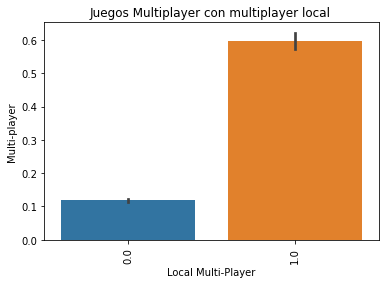

In [45]:
sns.barplot(y = 'Multi-player',x = 'Local Multi-Player', data = steam_split_ctg)
plt.xticks(rotation=90)
plt.title('Juegos Multiplayer con multiplayer local ')
plt.show()

+ Observamos que no todos los juegos multijugador cuentan con modo multijugador local

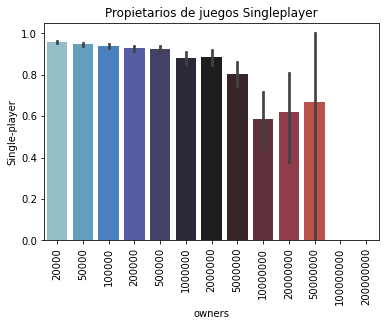

In [33]:
sns.barplot(x= 'owners', y='Single-player',palette = "icefire", data = steam_split_ctg)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos Singleplayer')
plt.show()

+ Ahora mostramos la cantidad de jugadores que tienen un juego con categoría un jugador, como podemos ver, es una categoría exitosa, pero no es un top ventas.

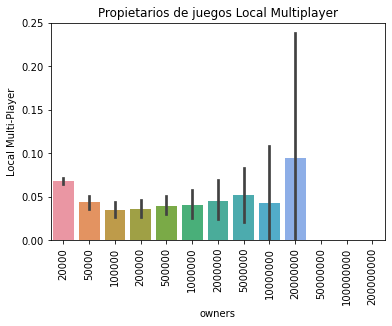

In [47]:
sns.barplot(x= 'owners', y='Local Multi-Player', data = steam_split_ctg)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos Local Multiplayer')
plt.show()

+ Como hemos podido ver antes, no todos los juegos multijugadores tienen modo local multiplayer.

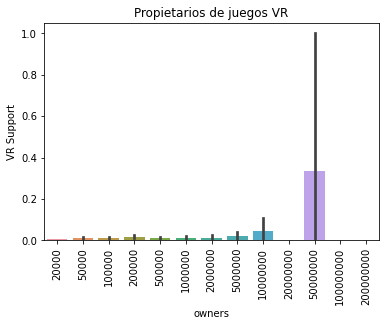

In [48]:
sns.barplot(x= 'owners', y='VR Support', data = steam_split_ctg)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos VR')
plt.show()

+ Como una tecnología aun en desarrollo no existen muchos videojuegos con este soporte

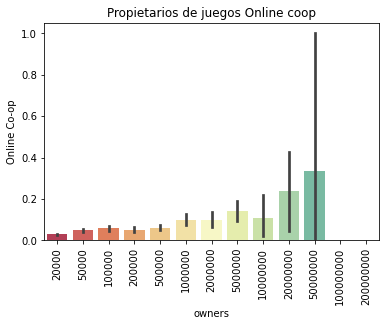

In [34]:
sns.barplot(x= 'owners', y='Online Co-op',palette="Spectral", data = steam_split_ctg)
plt.xticks(rotation=90)
plt.title('Propietarios de juegos Online coop')
plt.show()

+ Y por ultimo mostramos la categoría coop online para darnos cuenta que no todos los juegos multijugador tienen modo cooperativo. Algo que molesta, porque las historias cooperativas son muy disfrutables con amigos.

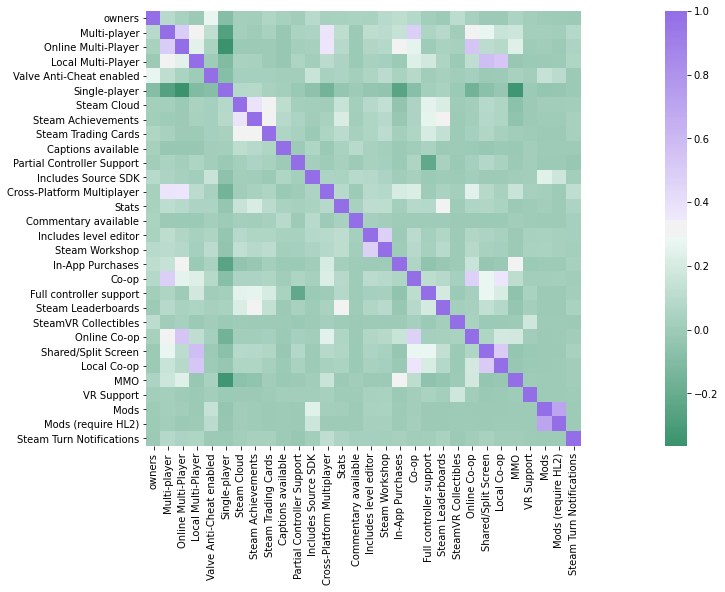

In [120]:
f, ax = plt.subplots(figsize=(30, 8))
corr = steam_split_ctg.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9,as_cmap=True),square=True, ax=ax, annot = False)

### 6.1º Conclusión analisis de Categorías
+ Para concluir con el analisis a las categorías podemos terminar con palabras como que, la categoría con mayor numero de jugadores es multiplayer, algo que podía ser previsible pero me he encontrado con que la categoría coop no es tan famosa como pensaba, y pensaba que estaba en más juegos. Aun así juegos como Borderlands que es una saga famosa, tiene modo Coop, ojalá se implemente en un numero mayor de videojuegos para disfrutar de historias con amigos.

### 7º Tratamiento de datos orientado al estudio de Precio contra Consumidores


+ Para concluir con este analisis vamos a su parte final continuando así con el precio, un apartado bastante importante en cuanto a la venta de videojuegos. Vamos a por ello.

In [14]:
steam_price = steam_dataset.copy()

In [27]:
#steam_price.head(5)

In [15]:
columns_to_drop = ['name','categories','genres','positive_ratings','negative_ratings','average_playtime','median_playtime']
steam_price = drop_columns(steam_price,columns_to_drop)

In [16]:
display(steam_price)

,platforms,owners,price
appid,,,
appid,platforms,owners,price
10,windows;mac;linux,10000000-20000000,7.19
20,windows;mac;linux,5000000-10000000,3.99
30,windows;mac;linux,5000000-10000000,3.99
40,windows;mac;linux,5000000-10000000,3.99
...,...,...,...
1065230,windows,0-20000,2.09
1065570,windows,0-20000,1.69
1065650,windows,0-20000,3.99


In [17]:
steam_price.drop(["appid"], inplace = True)

In [18]:
steam_price['owners'] = steam_price['owners'].apply(split_owners)
steam_price['owners'] = steam_price['owners'].astype(int)
steam_price['price'] = steam_price['price'].astype(float)

In [19]:
display(steam_price)

,platforms,owners,price
appid,,,
10,windows;mac;linux,20000000,7.19
20,windows;mac;linux,10000000,3.99
30,windows;mac;linux,10000000,3.99
40,windows;mac;linux,10000000,3.99
50,windows;mac;linux,10000000,3.99
...,...,...,...
1065230,windows,20000,2.09
1065570,windows,20000,1.69
1065650,windows,20000,3.99


In [20]:
all_platforms = steam_dataset['platforms'].apply(lambda x : x.split(';'))
#print(all_platforms)

platF = pd.unique([plat for x in all_platforms for plat in x])
#print(platF)

In [21]:
# crear tabla con columnas por plataformas
zeros = np.zeros( (len(steam_dataset), len(platF)) )
platf_frame = pd.DataFrame(zeros,columns=platF, index= steam_dataset.index)
columns_to_drop = ['platforms']
platf_frame = drop_columns(platf_frame,columns_to_drop)
#categ_frame.head(5)

In [22]:
columns_pt = platf_frame.columns # lista de plataformas (columnas)
# para cada juego, marcar plataforma con 1
for i, pt in enumerate(steam_dataset['platforms']):
    inds = columns_pt.get_indexer(pt.split(';')) # retorna los indices correspondientes a las plataforma de cada juego
    platf_frame.iloc[i,inds] = 1 # localiza las columnas de la plataforma correspondiente, marca con 1

In [204]:
#platf_frame.head(5)

In [29]:
steam_price_plt = steam_price.join(platf_frame)

In [30]:
steam_price_plt.head(5)

,platforms,owners,price,windows,mac,linux
appid,,,,,,
10,windows;mac;linux,20000000,7.19,1.0,1.0,1.0
20,windows;mac;linux,10000000,3.99,1.0,1.0,1.0
30,windows;mac;linux,10000000,3.99,1.0,1.0,1.0
40,windows;mac;linux,10000000,3.99,1.0,1.0,1.0
50,windows;mac;linux,10000000,3.99,1.0,1.0,1.0


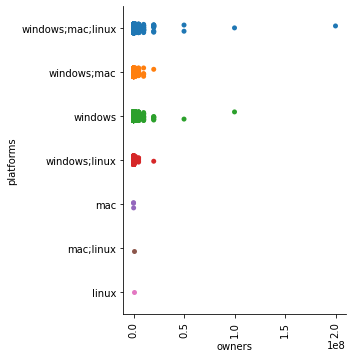

In [25]:
sns.catplot(x= 'owners', y='platforms', data = steam_price_plt)
plt.xticks(rotation=90)
plt.show()

+ La gran mayoria de videojuegos son multiplataforma, y la plataforma con mas juegos compatibles, se encuentra en windows

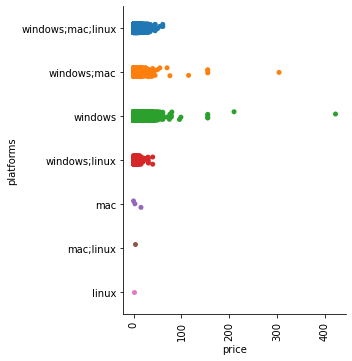

In [34]:
sns.catplot(x= 'price', y='platforms', data = steam_price_plt)
plt.xticks(rotation=90)
plt.show()

+ Parece ser que los juegos que solo estan en windows, son más caros

In [35]:
columns_to_drop = ['platforms']
steam_price_plt = drop_columns(steam_price_plt,columns_to_drop)

+ Ahora que ya tenemos todos los datos necesarios para poder trabajar sobre ellos en un analisis, proseguimos con el mismo.

### 8º Analisis (Precio vs Consumidores)

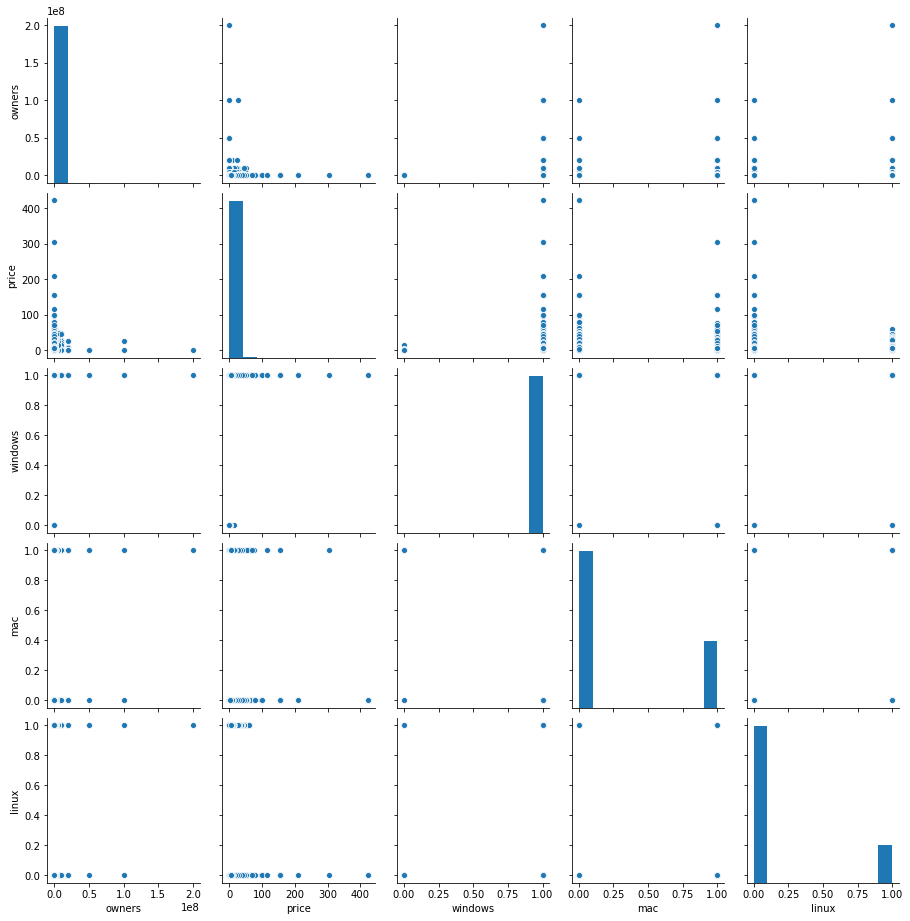

In [33]:
sns.pairplot(steam_price_plt)

+ En esta previsualización me he podido fijar en que los datos son muy similares en las 3 plataformas que existen en PC

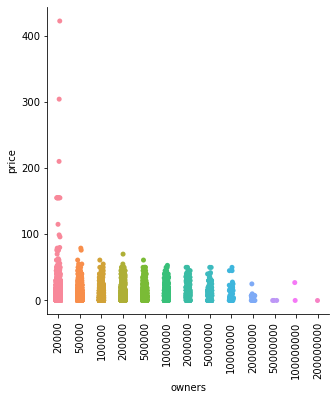

In [199]:
sns.catplot(x= 'owners', y='price', data = steam_price_plt)
plt.xticks(rotation=90)
plt.show()

+ En este caso me he podido fijar en que los juegos mas vendidos, son juegos con precios muy por debajo de los 100 dolares, y los menos vendidos resultan ser los mas caros, incluso habiendo casos de que juegos valen mas de 400 dolares, pero con muy pocos compradores.

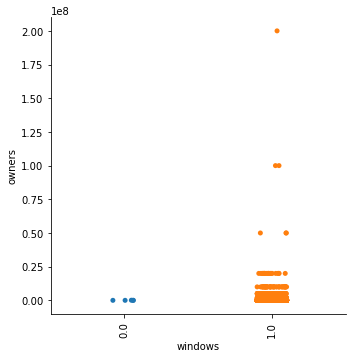

In [213]:
sns.catplot(y= 'owners', x='windows', data = steam_price_plt)
plt.xticks(rotation=90)
plt.show()

+ Algo obvio este resultado, la mayoria de jugadores se encuentran en windows, algo que puede resultar mas que evidente, pero quería verificarlo.

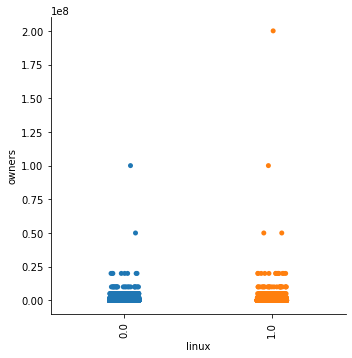

In [215]:
sns.catplot(y= 'owners', x='linux', data = steam_price_plt)
plt.xticks(rotation=90)
plt.show()

+ Y como en la grafica antes vista, se puede observar que no todos los juegos están en linux.

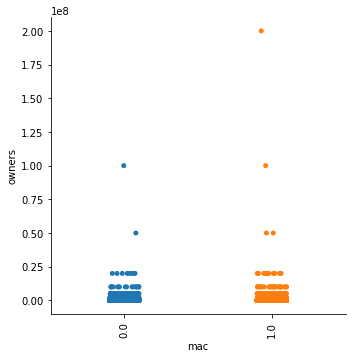

In [52]:
sns.catplot(y= 'owners', x='mac', data = steam_price_plt)
plt.xticks(rotation=90)
plt.show()

+ Y en este caso podemos ver que los datos de mac son muy similares a los de linux.

### 8.1º Conclusión (Precio vs Consumidores)
+ Viendo los datos resultados de los gráficos mostrados, se puede concluir con que el precio es un factor muy importante en el mundo de los videojuegos, así como en que plataforma desarrolles. 

### 9º Conclusión Final 

+ Para poder finalizar con este analisis extenso sobre el mundo de los videojuegos en la plataforma principal del mundo del Pc como es Steam, nos podemos fijar en que los datos son muy claros en cuales son las claves de triunfo de un videjuego. Las claves son:
    + Tener un juego con un precio reducido.
    + Que sea de género de acción ya que es de los géneros mas demandados
    + Y que disponga de modo multijugador
+ Con esas tres claves puedes asegurar que tu juego va a ser jugado, luego entran factores como si el juego es de calidad, que eso en este analisis no he querido meterme. Juegos rompedores como Among Us es un juego que lo ha petado mucho porqué, su precio es inferior a los 4 dolares, es un juego indie pero con acción y frenesí, y lo más importante que es el porque tiene tantos jugadores, es su modo multijugador. Aparte de estos datos los multijugadores suelen ser más longevos que los singleplayers. Tambien existén fracasos muy importantes como puede ser Anthem, un juego que prometía mucho, donde su género principal era acción y es multijugador, pero el precio y la calidad del juego no acompañaron con lo prometido, por eso y por su falta de expansión del juego en el postgame, hizo que la gente lo abandonase. A lo que me refiero que en general las claves se repiten y son reales, hasta que llega un juego que las rompe y aun cumpliendolas fracasa.